<a href="https://colab.research.google.com/github/DSNortsev/CSE590-PythonAndDataAnalytics/blob/main/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Install config parser
!pip install configparser 

import configparser
from google.colab import drive

# Make directory in Google Colabs
!mkdir -p /content/.twitter
# Mount Google Drive 
drive.mount('/content/drive')
# Copy twitter keys
!cp "/content/drive/MyDrive/CSE590/private_keys" /content/config
# Read Configuration file
config = configparser.ConfigParser(interpolation=None)
config.read('/content/config')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/config']

**1.(Trends, Searches, and Sentiment - 60 pts)**

**a. Use Tweets's Trends API to determine the available trending topics for a city of your choice, and assign a tweet volume of 5000 to any trend with no volume provided.**

In [101]:
import tweepy
# Set up the app key
auth = tweepy.OAuthHandler(config['twitter']['APIK'],
                           config['twitter']['APISK'])
# Set up user token
auth.set_access_token(config['twitter']['ACCTO'],
                      config['twitter']['ACCTOS'])
# 
api = tweepy.API(auth, wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [118]:
def update_missing_tweets_volume(trends):
  """Assign a tweet volume of 5000 to trends with None volume"""
  import copy
  # Make a deep copy of trends
  processed_tweets = copy.deepcopy(trends)
  
  for tweet in processed_tweets:
    if not tweet['tweet_volume']:
      tweet.update({'tweet_volume': 5000})
  return processed_tweets

In [123]:
# Find id in https://www.findmecity.com/
dallas_trends = api.trends_place(id=2388929)[0]['trends']
dallas_trends_processed = update_missing_tweets_volume(dallas_trends)

In [128]:
api.rate_limit_status()['resources']['trends']['/trends/place']

{'limit': 75, 'remaining': 73, 'reset': 1618095023}

**b. After sorting the trends in descending order by volume, create a bar graph with each (sorted) trend on the x-axis against its volume on the y-axis.**

In [ ]:
from operator import itemgetter
# Sort the trends in descending order
dallas_trends_processed.sort(key=itemgetter('tweet_volume'), reverse=True)
dallas_trends_processed

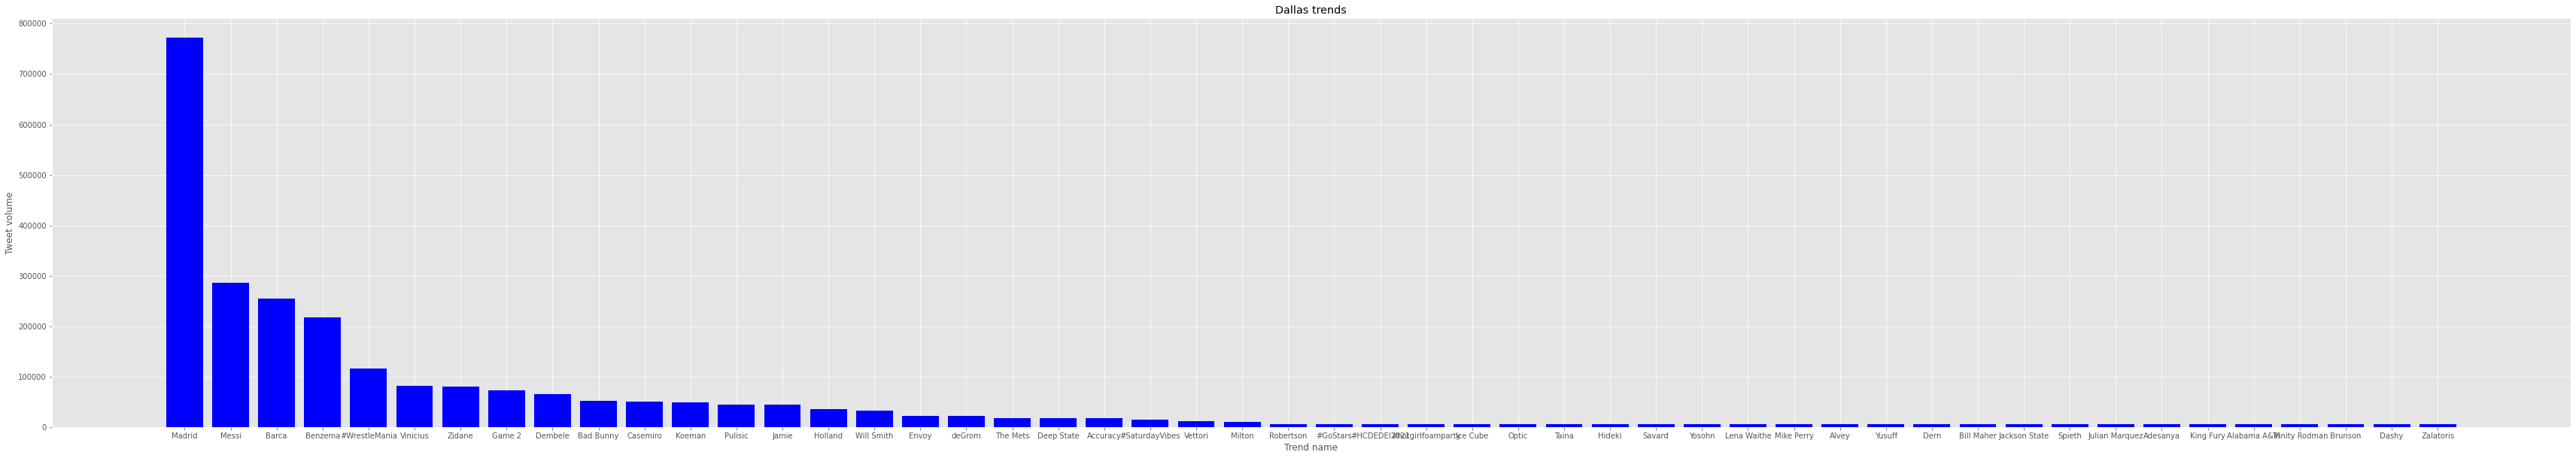

In [149]:
def print_trends(trends):
  """Plot the trends"""
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.figure(figsize=(60,10))
  plt.style.use('ggplot')

  x_val = [trend['name'] for trend in trends]
  y_val = [trend['tweet_volume'] for trend in trends]

  x_pos = [i for i, _ in enumerate(x_val)]

  plt.bar(x_pos, y_val, color='blue')
  plt.title('Dallas trends')
  plt.xlabel('Trend name')
  plt.ylabel('Tweet volume')
  plt.xticks(x_pos, x_val)
  plt.show()

print_trends(dallas_trends_processed)

**c. Use the Twitter Search API to find 100 tweets for each of the three most popular trends in the chosen city, and preprocess their associated tweet text (preferring extended tweet text, if available) in a manner appropriate for tweets.**

In [150]:
api.rate_limit_status()['resources']['search']['/search/tweets']

{'limit': 180, 'remaining': 180, 'reset': 1618099473}

In [214]:
tweets = api.search(q="Madrid", geocode="32.7767,96.7970,400mi",tweet_mode='extended', count=100)

In [217]:
tweets[0].full_text

'Hala Madrid🏆🏆🏆 https://t.co/kX1zjkJBcV'

In [ ]:
dallas_trends_processed

In [212]:
top_trandes = [ trend['name'] for trend in dallas_trends_processed][:3]

In [231]:
def retrieve_tweets(trends):
  # Dallas location
  all_tweets = {}  
  # Dallas location
  location = "32.7767,96.7970,600mi"

  for trend in trends:
    tweets = api.search(q=trend + " -filter:retweets", geocode=location, tweet_mode='extended', count=100)
    all_tweets[trend] = [tweet.full_text for tweet in tweets]
  return all_tweets

In [232]:
tweets = retrieve_tweets(top_trandes)

In [234]:
len(tweets['Madrid'])

100

**d. Use TextBlob to determine the sentiment for each set of 100 tweets. Do you notice a substantial difference in the proportion of positive and negative sentiment for the three trends? Try to theorize why or why not in a paragraph.**